In [47]:
import pandas as pd

In [48]:
df=pd.read_csv("./train.csv")

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
df2=df.drop(columns="Cabin")

In [53]:
df3=df2.fillna({ "Embarked": "unknown"})

In [54]:
df4=df3.fillna(df3.mean())

In [55]:
df4.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [57]:
onehot = pd.get_dummies(df4["Embarked"])
df5 = pd.concat([df4, onehot], axis=1)

In [58]:
df5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,unknown
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0


In [59]:
df5["Sex"] = df5["Sex"].astype("category")
#Sexの列のデータ型をカテゴリーに変換
df5["Sex_cat"]=df5["Sex"].cat.codes
#Sexの列をラベルエンコーディングに変えて、新しくSex_catの列を作る
df5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,unknown,Sex_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,1


In [60]:
df5["Fare1"]=df5["Fare"]/(df5["SibSp"]+df5["Parch"]+1)

In [61]:
df5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,unknown,Sex_cat,Fare1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0,0,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,1,8.05000


In [62]:
df_last=df5.drop(columns=["Name","Sex","Ticket","Embarked"])
df_last.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,unknown,Sex_cat,Fare1
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1,3.62500
1,2,1,1,38.0,1,0,71.2833,1,0,0,0,0,35.64165
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,7.92500
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,26.55000
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1,8.05000


In [68]:
y=df_last["Survived"].values
x=df_last.iloc[:,2:13].values

Text(0.5, 1.0, 'Fare1')

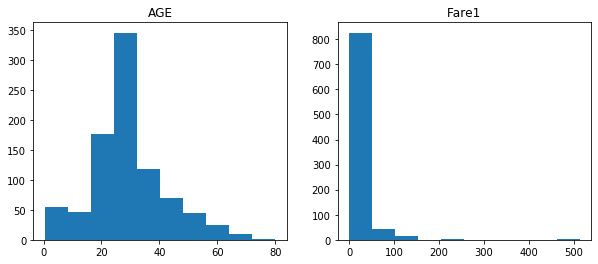

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(x[:,1])
plt.title("AGE")
plt.subplot(1,2,2)
plt.hist(x[:,10])
plt.title("Fare1")

In [67]:
x

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,unknown,Sex_cat,Fare1
0,3,22.000000,1,0,7.2500,0,0,1,0,1,3.62500
1,1,38.000000,1,0,71.2833,1,0,0,0,0,35.64165
2,3,26.000000,0,0,7.9250,0,0,1,0,0,7.92500
3,1,35.000000,1,0,53.1000,0,0,1,0,0,26.55000
4,3,35.000000,0,0,8.0500,0,0,1,0,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,0,1,0,1,13.00000
887,1,19.000000,0,0,30.0000,0,0,1,0,0,30.00000
888,3,29.699118,1,2,23.4500,0,0,1,0,0,5.86250
889,1,26.000000,0,0,30.0000,1,0,0,0,1,30.00000


In [80]:
from sklearn.preprocessing import MinMaxScaler #スケーリング
from sklearn.preprocessing import StandardScaler #標準化
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#訓練用（x_train,y_train）と検証用（x_test,y_test）に分ける
x_train, x_test,y_train,y_test=train_test_split(x,y)

scale=MinMaxScaler() #scale変換の関数を準備。標準化ではStandardScaler
scale.fit(x_train) #x_trainを用いて、scaleを学習
x_train_scale=scale.transform(x_train) #学習済みscaleをx_trainに適用
x_test_scale=scale.transform(x_test) #同じscaleをx_testに適用


model=LogisticRegression()#LassoをRidgeに置き換えるとRidge回帰
model.fit(x_train_scale,y_train) #学習用データで学習

print("train:",model.score(x_train_scale,y_train)) #学習用データでのスコア
print("test:",model.score(x_test_scale,y_test)) #検証用データでのスコア



train: 0.7964071856287425
test: 0.8251121076233184


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [88]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#訓練用（x_train,y_train）と検証用（x_test,y_test）に分ける
x_train, x_test,y_train,y_test=train_test_split(x,y)

trans=PowerTransformer(method="yeo-johnson") #box-coxかyeo-johnson
trans.fit(x_train) #x_trainを用いて、scaleを学習
x_train_trans=trans.transform(x_train) #学習済みscaleをx_trainに適用
x_test_trans=trans.transform(x_test) #同じscaleをx_testに適用

model=LogisticRegression(solver="lbfgs")
model.fit(x_train_trans,y_train) #学習用データで学習

print("train:",model.score(x_train_trans,y_train)) #学習用データでのスコア
print("test:",model.score(x_test_trans,y_test)) #検証用データでのスコア


train: 0.8023952095808383
test: 0.7713004484304933
